# CS381/780 Data Analytics Final Project

### Due on 12/13/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on the follwoing 

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

### Your task in the final project is build the best predictive model to classify if a loan will carry good or bad credit risks. The focus should be in identifying bad risk loans

* Try at least two of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* Answer the question whether past credit history will be an important factor or not.

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations

In [4]:
df = pd.read_csv("german_credit_modified.csv")
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


In [5]:
df['Risk'] = df['Risk'].apply(lambda x: 'good' if x == 1 else 'bad')

In [6]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,bad


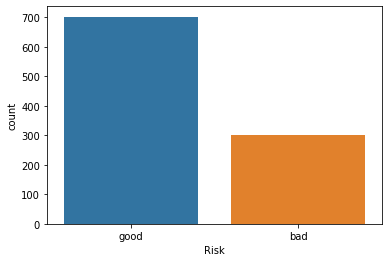

In [7]:
sns.countplot(df['Risk'])

***The original dataset is hard to understand. So we are going to decode the fields to an easier to understand format***

In [8]:
decode_map = {'A11': 'little', 'A12': 'moderate', 'A13': 'rich', 'A14': 'No Account',
              'A30': 'paid back', 'A31': 'paid back', 'A32': 'paid back', 
              'A33': 'delay', 'A34': 'default',
              'A40' : 'car',
              'A41' : 'car',
              'A42' : 'furniture/equipment',
              'A43' : 'radio/television',
              'A44' : 'domestic appliances',
              'A45' : 'repairs',
              'A46' : 'education',
              'A47' : 'vacation',
              'A48' : 'retraining',
              'A49' : 'business',
              'A410' : 'others',
              'A61' :  'little',
              'A62' :  'moderate',
              'A63' :  'quite rich',
              'A64' :  'rich',
              'A65' :  'unknown',
              
              'A71' : 'unemployed',
              'A72' : '< 1 year',
              'A73' : '1 to <4 years',
              'A74': '4 to <7 years',
              'A75' : '>= 7 years',

              'A91' : 'male   : divorced/separated',
              'A92' : 'female : divorced/separated/married',
              'A93' : 'male   : single',
              'A94' : 'male   : married/widowed',
              'A95' : 'female : single',
              
              'A101' : 'none',
              'A102' : 'co-applicant',
              'A103' : 'guarantor',

              'A121' : 'real estate',
              'A122' : 'life insurance',
              'A123' : 'car',
              'A124' : 'no property',
              
              'A141' : 'bank',
              'A142' : 'stores',
              'A143' : 'none',
              'A151' : 'rent',
              'A152' : 'own',
              'A153' : 'for free',


              'A171' : 'unemployed/non-resident',
              'A172' : 'unskilled/resident',
              'A173' : 'skilled employee',
              'A174' : 'management/highly qualified employee',
            
             }

In [9]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: decode_map[x] if x in decode_map.keys() else x)

In [10]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,good
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,bad
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,good
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,good
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,bad


In [11]:
df.shape

(1003, 19)

***Now you can start from this dataset***

### Good Luck !!!

Show all your work below

### EDA and basic exploration

In [12]:
df.isnull().sum()

Checking Account            0
Duration                    0
Credit History              1
Purpose                     0
Credit Amount               0
Saving Account              0
Employment Status           0
Installment Rate            0
Personal Status             0
Guarantors                  0
Years in current address    0
Property                    0
Age                         0
Installment plans           0
Housing                     0
Existing Credits            0
Job                         1
Liable                      0
Risk                        0
dtype: int64

In [13]:
df = df.dropna()
df.isnull().sum()

Checking Account            0
Duration                    0
Credit History              0
Purpose                     0
Credit Amount               0
Saving Account              0
Employment Status           0
Installment Rate            0
Personal Status             0
Guarantors                  0
Years in current address    0
Property                    0
Age                         0
Installment plans           0
Housing                     0
Existing Credits            0
Job                         0
Liable                      0
Risk                        0
dtype: int64

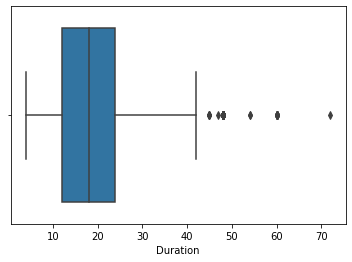

In [14]:
sns.boxplot(x=df['Duration'])

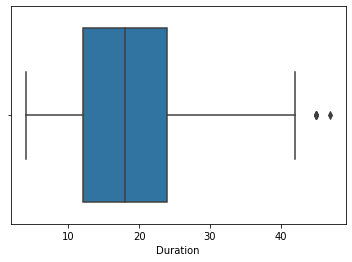

In [15]:
q_highest = df["Duration"].quantile(0.98)
df = df[(df['Duration']<q_highest)]
sns.boxplot(x=df['Duration'])

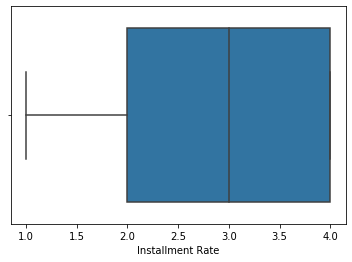

In [16]:
sns.boxplot(x=df['Installment Rate'])

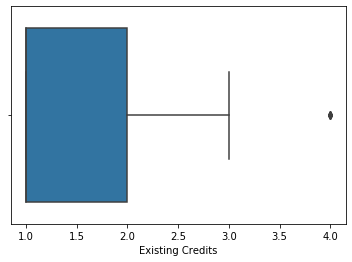

In [17]:
sns.boxplot(x=df['Existing Credits'])

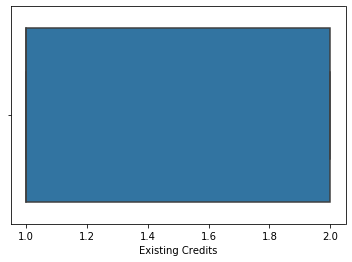

In [18]:
q_highest = df["Existing Credits"].quantile(0.99)
df = df[(df['Existing Credits']<q_highest)]
sns.boxplot(x=df['Existing Credits'])

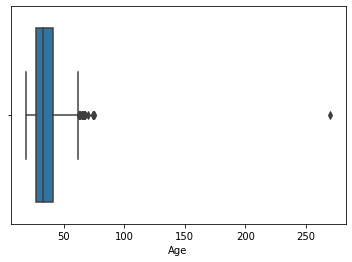

In [19]:
sns.boxplot(x=df['Age'])

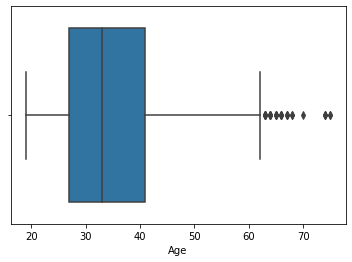

In [20]:
df = df[df.Age<=100]
sns.boxplot(x=df['Age'])

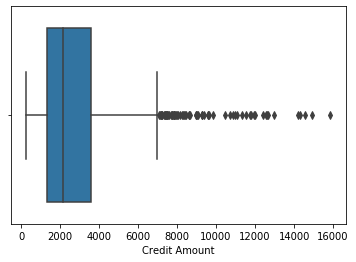

In [21]:
sns.boxplot(x=df['Credit Amount'])

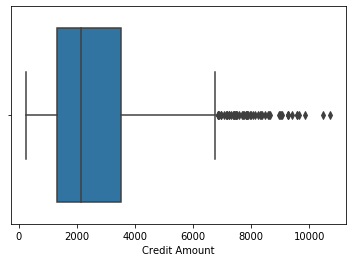

In [22]:
q_highest = df["Credit Amount"].quantile(0.98)
df = df[(df['Credit Amount']<q_highest)]
sns.boxplot(x=df['Credit Amount'])

In [23]:
df.groupby('Risk').mean()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable
Risk,,,,,,,
bad,21.061728,2842.069959,3.193416,2.781893,33.123457,1.316872,1.156379
good,17.864275,2691.237129,2.928237,2.836193,35.823713,1.361934,1.140406


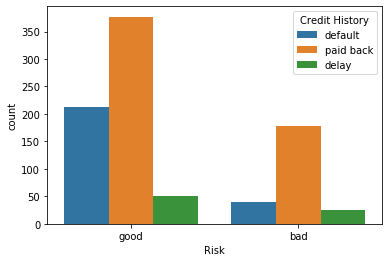

In [24]:
sns.countplot(x='Risk', hue='Credit History', data= df)

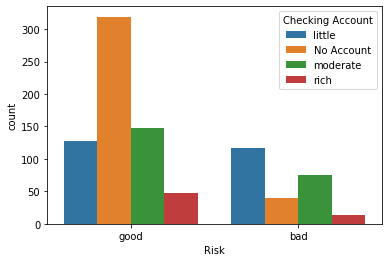

In [25]:
sns.countplot(x='Risk', hue='Checking Account', data= df)

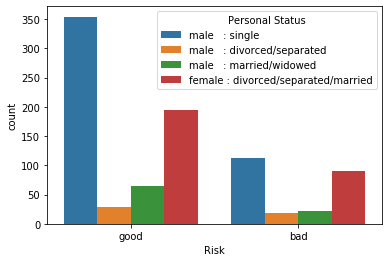

In [26]:
sns.countplot(x='Risk', hue='Personal Status', data= df)

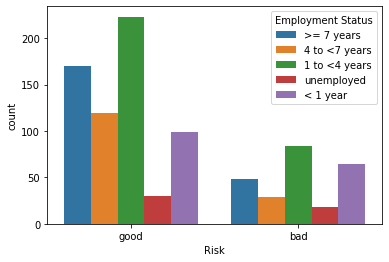

In [27]:
sns.countplot(x='Risk', hue='Employment Status', data= df)

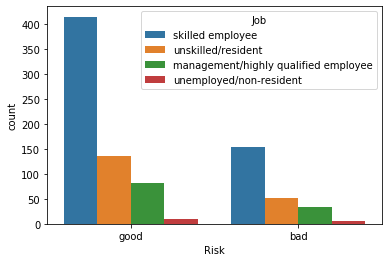

In [28]:
sns.countplot(x='Risk', hue='Job', data= df)

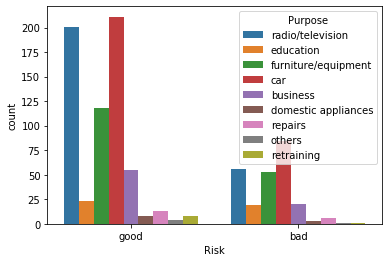

In [29]:
sns.countplot(x='Risk', hue='Purpose', data= df)

### Dummy variable to take care categorical variables and Nomalization of numerical features

In [30]:
from sklearn.preprocessing import MinMaxScaler
numerical_features = ['Age', 'Credit Amount', 'Existing Credits','Installment Rate','Duration']
numerical_df = df[numerical_features]
for column in numerical_df.columns.tolist():
    numerical_df[column] = MinMaxScaler().fit_transform(np.array(numerical_df[column]).reshape(-1,1))

numerical_df.head()


,Age,Credit Amount,Existing Credits,Installment Rate,Duration
0,0.857143,0.087758,1.0,1.000000,0.046512
2,0.535714,0.176280,0.0,0.333333,0.186047
3,0.464286,0.728801,0.0,0.333333,0.883721
4,0.607143,0.441176,1.0,0.666667,0.465116
5,0.285714,0.840814,0.0,0.333333,0.744186


In [31]:
purpose_dum = pd.get_dummies(df['Purpose'],drop_first=True)
credit_hist_dum = pd.get_dummies(df['Credit History'],drop_first=True)
checking_account_dum = pd.get_dummies(df['Checking Account'],drop_first=True)
personal_status_dum = pd.get_dummies(df['Personal Status'],drop_first=True)
employment_status_dum = pd.get_dummies(df['Employment Status'],drop_first=True)
job_dum = pd.get_dummies(df['Job'],drop_first=True)
housing_dum = pd.get_dummies(df['Housing'],drop_first=True)
property_dum = pd.get_dummies(df['Property'],drop_first=True)

In [32]:
purpose_dum.head()

,car,domestic appliances,education,furniture/equipment,others,radio/television,repairs,retraining
0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0


In [33]:
df2 = pd.concat([numerical_df, credit_hist_dum, employment_status_dum,
                checking_account_dum,
                job_dum,housing_dum,property_dum,
                df['Risk']], axis=1)
df2.head()
df2

,Age,Credit Amount,Existing Credits,Installment Rate,Duration,delay,paid back,4 to <7 years,< 1 year,>= 7 years,...,rich,skilled employee,unemployed/non-resident,unskilled/resident,own,rent,life insurance,no property,real estate,Risk
0,0.857143,0.087758,1.0,1.000000,0.046512,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,good
2,0.535714,0.176280,0.0,0.333333,0.186047,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,good
3,0.464286,0.728801,0.0,0.333333,0.883721,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,good
4,0.607143,0.441176,1.0,0.666667,0.465116,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,bad
5,0.285714,0.840814,0.0,0.333333,0.744186,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.214286,0.141902,0.0,0.666667,0.186047,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,good
998,0.375000,0.344442,0.0,1.000000,0.604651,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,good
999,0.339286,0.052903,0.0,1.000000,0.186047,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,good
1000,0.071429,0.152311,0.0,1.000000,0.953488,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,bad


### Model fitting with Credit History data and performing Cross-validations, separating data set into training and testing

In [34]:
model = svm.SVC(kernel = 'linear')
x_train, x_test, y_train, y_test = train_test_split(df2.drop('Risk',axis=1),
                                                    df2['Risk'], test_size=0.20,
                                                    random_state=121)

model.fit(x_train, y_train)

SVC(kernel='linear')

In [35]:
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         bad       0.80      0.27      0.41        44
        good       0.80      0.98      0.88       133

    accuracy                           0.80       177
   macro avg       0.80      0.63      0.64       177
weighted avg       0.80      0.80      0.76       177

0.8022598870056498


Trial : 0 , Accuracy :  0.751412429378531 , Slope: [[ 0.62632248 -0.24917501 -0.29181783 -0.62278522 -0.90534732 -0.84578595
  -0.84407137  0.21707529 -0.39055832  0.19173062 -0.51122946 -1.44328714
  -0.3983077  -0.30558937 -0.11944884  1.         -0.14291268 -0.32666996
  -0.57288824  0.19001006 -0.50437763  0.27413486]] , Intercept: , [3.18969995]
Trial : 1 , Accuracy :  0.8022598870056498 , Slope: [[ 0.53717931  0.40376735 -0.20854638 -0.53683701 -1.1340961  -0.59063318
  -0.5987472   0.10701075 -0.36883668  0.19106199 -0.08435855 -1.11508621
  -0.42945478 -0.22206939 -0.09945494 -0.20440259 -0.20258973 -0.414828
  -0.72527185  0.21692111 -0.58503629  0.26159768]] , Intercept: , [2.91661869]
Trial : 2 , Accuracy :  0.7853107344632768 , Slope: [[ 0.76488428  0.0881021  -0.22326385 -0.48184269 -1.07600374 -0.67183055
  -0.64232314  0.01940033 -0.46162607  0.08020722 -0.45972276 -1.31927834
  -0.39190634 -0.47597198 -0.15362257  0.78300598 -0.12790792 -0.37493406
  -0.51185971  0.1201

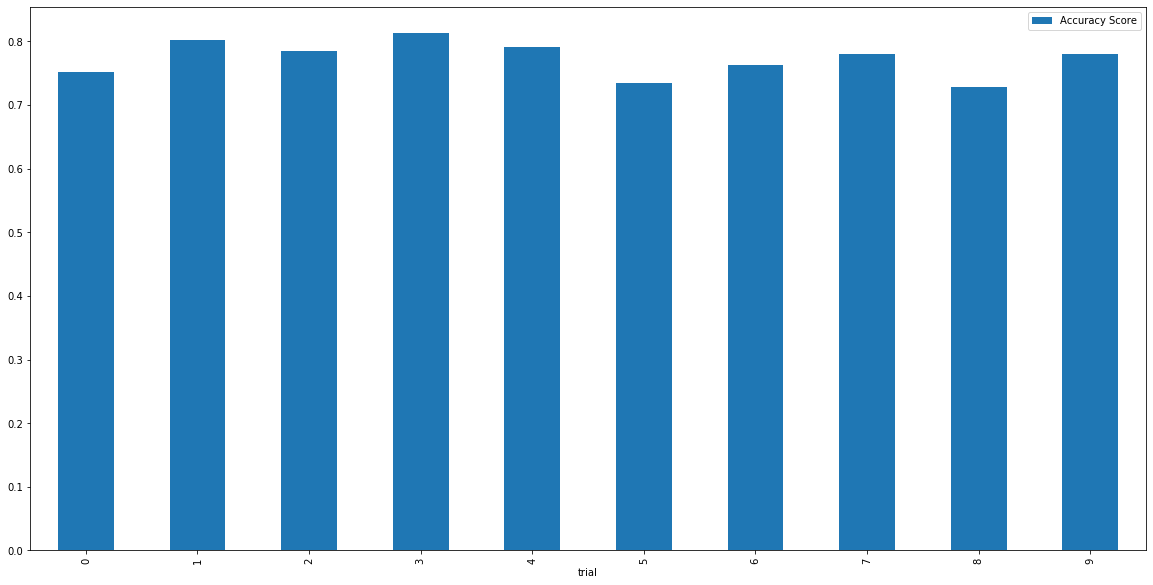

In [36]:
import random
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('Risk',axis=1),
                                                    df2['Risk'], test_size=0.20,
                                                    random_state = random.randint(1,1000))
    model = svm.SVC(kernel = 'linear')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    print('Trial :',i, ', Accuracy : ',accuracy[i] ,', Slope:',model.coef_ ,', Intercept: ,',model.intercept_)
    
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy Score': accuracy})
rdf.plot.bar(x='trial', y='Accuracy Score' ,figsize=(20, 10))


In [37]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print('Accuracy Score:', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         bad       0.63      0.39      0.48        44
        good       0.82      0.92      0.87       133

    accuracy                           0.79       177
   macro avg       0.72      0.66      0.67       177
weighted avg       0.77      0.79      0.77       177

Accuracy Score: 0.7909604519774012


Trial : 0 , Accuracy :  0.7401129943502824
Trial : 1 , Accuracy :  0.7740112994350282
Trial : 2 , Accuracy :  0.6949152542372882
Trial : 3 , Accuracy :  0.751412429378531
Trial : 4 , Accuracy :  0.8531073446327684
Trial : 5 , Accuracy :  0.7401129943502824
Trial : 6 , Accuracy :  0.7909604519774012
Trial : 7 , Accuracy :  0.751412429378531
Trial : 8 , Accuracy :  0.7344632768361582
Trial : 9 , Accuracy :  0.7740112994350282


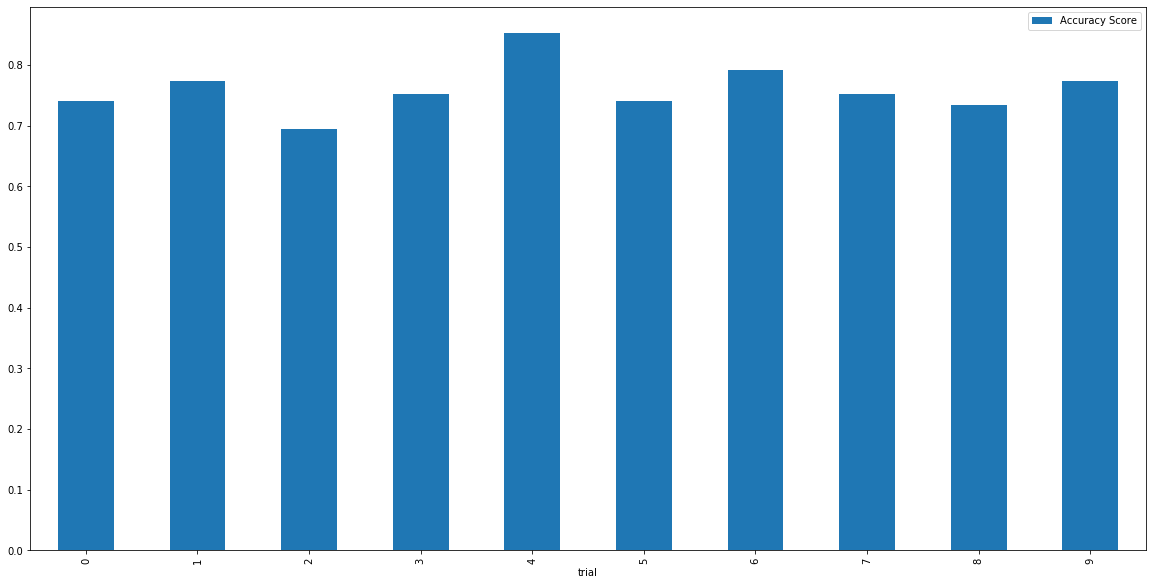

In [38]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('Risk',axis=1),
                                                    df['Risk'], test_size=0.20,
                                                    random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    print('Trial :',i, ', Accuracy : ',accuracy[i])
    
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy Score': accuracy})
rdf.plot.bar(x='trial', y='Accuracy Score' ,figsize=(20, 10))

In [39]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print('Accuracy Score:', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         bad       0.58      0.34      0.43        44
        good       0.81      0.92      0.86       133

    accuracy                           0.77       177
   macro avg       0.69      0.63      0.64       177
weighted avg       0.75      0.77      0.75       177

Accuracy Score: 0.7740112994350282


Trial : 0 , Accuracy :  0.7457627118644068
Trial : 1 , Accuracy :  0.6892655367231638
Trial : 2 , Accuracy :  0.7627118644067796
Trial : 3 , Accuracy :  0.7005649717514124
Trial : 4 , Accuracy :  0.6949152542372882
Trial : 5 , Accuracy :  0.7231638418079096
Trial : 6 , Accuracy :  0.7570621468926554
Trial : 7 , Accuracy :  0.7853107344632768
Trial : 8 , Accuracy :  0.7344632768361582
Trial : 9 , Accuracy :  0.768361581920904


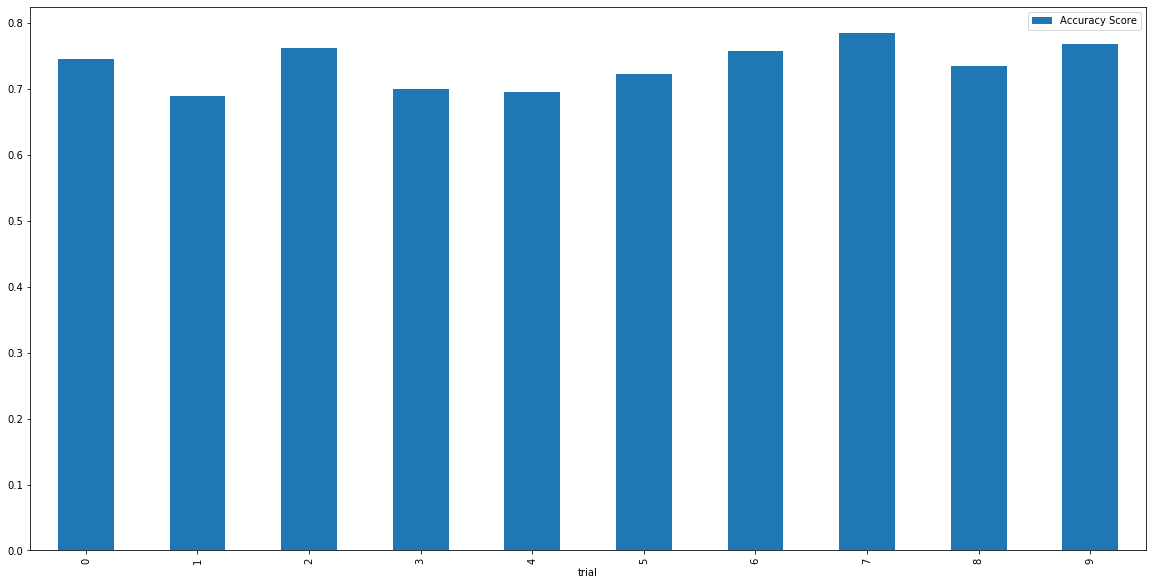

In [40]:

accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('Risk',axis=1),
                                                    df['Risk'], test_size=0.20,
                                                    random_state = random.randint(1,1000))
    model = RandomForestClassifier()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    print('Trial :',i, ', Accuracy : ',accuracy[i])
    
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy Score': accuracy})
rdf.plot.bar(x='trial', y='Accuracy Score' ,figsize=(20, 10))

### Model fitting without Credit History data

In [41]:
df3 = pd.concat([numerical_df, employment_status_dum,
                checking_account_dum,
                job_dum,housing_dum,property_dum,
                df['Risk']], axis=1)
df3.head()


,Age,Credit Amount,Existing Credits,Installment Rate,Duration,4 to <7 years,< 1 year,>= 7 years,unemployed,little,...,rich,skilled employee,unemployed/non-resident,unskilled/resident,own,rent,life insurance,no property,real estate,Risk
0,0.857143,0.087758,1.0,1.000000,0.046512,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,good
2,0.535714,0.176280,0.0,0.333333,0.186047,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,good
3,0.464286,0.728801,0.0,0.333333,0.883721,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,good
4,0.607143,0.441176,1.0,0.666667,0.465116,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,bad
5,0.285714,0.840814,0.0,0.333333,0.744186,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,good


In [42]:
model = svm.SVC(kernel = 'linear')
x_train, x_test, y_train, y_test = train_test_split(df3.drop('Risk',axis=1),
                                                    df3['Risk'], test_size=0.20,
                                                    random_state=121)

model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         bad       0.65      0.25      0.36        44
        good       0.79      0.95      0.87       133

    accuracy                           0.78       177
   macro avg       0.72      0.60      0.61       177
weighted avg       0.76      0.78      0.74       177

0.7796610169491526


In [43]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print('Accuracy Score:', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         bad       0.63      0.39      0.48        44
        good       0.82      0.92      0.87       133

    accuracy                           0.79       177
   macro avg       0.72      0.66      0.67       177
weighted avg       0.77      0.79      0.77       177

Accuracy Score: 0.7909604519774012


In [44]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print('Accuracy Score:', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         bad       0.50      0.25      0.33        44
        good       0.79      0.92      0.85       133

    accuracy                           0.75       177
   macro avg       0.64      0.58      0.59       177
weighted avg       0.72      0.75      0.72       177

Accuracy Score: 0.751412429378531


### The performance of the SVM, RandomForest of 3 models are decreased when they are fitted without Credit History data. Therefore, past credit history is important factor to decide loan's risk.